In [1]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from matplotlib.pyplot import specgram
import tensorflow as tf
import math
%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

In [2]:
class Sound:
    def __init__(self, fp):
        X, sr = sf.read(fp)
        sound = np.array(X)
        # librosa operates on (lenght, channels) matrices, wheras soundfile gave us (channels, lenght) 
        # so we transpose
        sound = np.transpose(sound)
        sound = librosa.core.to_mono(sound)
        # resample so every wave has same sampling rate
        sound = librosa.core.resample(sound, sr, 10000)
        
        # set class number
        self.classNumber = int(fp.split("/")[1].split("-")[1])
        # set wave - sound amp in time
        self.wave = sound
        # compute and set mel spectrogram
        self.mel = librosa.feature.melspectrogram(sound, sr=10000, hop_length=506)
        

In [3]:
class NeuralNetwork:
    countNetwoks=0
    def __init__(self,numin=None,numout=None,hiddenlayers=None,learningrate=None,arrtrain=None,arrtest=None,neural=None):
        NeuralNetwork.countNetwoks+=1
        self.myId=NeuralNetwork.countNetwoks
        if neural!=None:
            self.numIn=neural.numIn
            self.numOut=neural.numOut
            self.hiddenLayers=neural.hiddenLayers[:]
            self.learningRate=neural.learningRate
            if numin!=None:
                self.numIn = numin
            if numout!= None:
                self.numOut= numout
            if hiddenlayers!= None:
                self.hiddenLayers=hiddenlayers[:]
            if learningrate!= None:
                self.learningRate=learningrate
        else:
            self.numIn=numin
            self.numOut=numout
            self.hiddenLayers = hiddenlayers
            self.learningRate = learningrate
    def train(self,arrtrain,arrtest=None):
        prepareNet(self.numIn,self.numOut,self.hiddenLayers,self.learningRate,arrtrain,self.myId)
        if arrtest!= None:
            self.scores = testNet(arrtest, self.myId)
            self.mainScore = self.scores.trace()/self.scores.sum()
    def test(self,arrtest):
            self.scores = testNet(arrtest, self.myId)
            self.mainScore = self.scores.trace()/self.scores.sum()        
            
        

In [13]:
from multiprocessing import Process, Lock, Pipe,Event
import time



arrtrain = []
arrtuning=[]
arrtest=[]
def add(x,c,e):
    temp = []
    #for file in glob.glob(x):
        #temp.append(Sound(file))
    e.wait()
    #c.send(1)
    del temp
        
ts = time.time()

if __name__ == '__main__':
    threads= []
    connections=[0]*10
    events = [Event()]*11
    for x in xrange(5,11):
        events[x].clear()
    lock = Lock()
    for x in xrange(1,11):
        connections[x-1],childPipe=Pipe()
        threads.append(Process(target=add, args=("fold"+str(x)+"/*.wav",childPipe,events[x-1])))         
        threads[x-1].start()
    fold = 1
    for x,y in zip(threads,connections):
        #if fold < 8:
        #    arrtrain.extend(y.recv())
        #elif fold == 8 :
        #    arrtuning.extend(y.recv())
        #else:
        #    arrtest.extend(y.recv())
        for event in events:
            print event.is_set()
        x.join()
        print "====="
        events[fold].set()
        fold+=1
    print "I'm done, time was:" , time.time()-ts

False
False
False
False
False
False
False
False
False
False
False


Process Process-90:
Process Process-82:
Process Process-84:
Process Process-83:
Process Process-85:
Process Process-81:
Process Process-89:
Traceback (most recent call last):
Process Process-88:
Traceback (most recent call last):
Process Process-86:
Process Process-87:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py",

KeyboardInterrupt: 

    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "<ipython-input-13-c9d3be3c6709>", line 13, in add
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-13-c9d3be3c6709>", line 13, in add
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-13-c9d3be3c6709>", line 13, in add
    e.wait()
  File "<ipython-input-13-c9d3be3c6709>", line 13, in add
  File "<ipython-input-13-c9d3be3c6709>", line 13, in add
  File "<ipython-input-13-c9d3be3c6709>", line 13, in add
  File "<ipython-input-13-c9d3be3c6709>", line 13, in add
  File "<ipython-input-13-c9d3be3c6709>", line 13, in add
    e.wait()
  File "/usr/lib/python2.7/multiprocessing/synchronize.py", line 337, in wait
    e.wait()
    e.wait()
    e.wait()
    e.wait()
    self._cond.wait(timeout)
  File "/usr/lib/python2.7/multiprocessing/synch

In [5]:


# 2.4 Build inference graph.
def mnist_inference(sounds, numin,numout,hiddenLayers):
    """Build the MNIST model up to where it may be used for inference.
    Args:
        images: Images placeholder.
        hidden1_units: Size of the first hidden layer.
        hidden2_units: Size of the second hidden layer.
    Returns:
        logits: Output tensor with the computed logits.
    """
    hidden=[]
    # Hidden 1
    with tf.name_scope('hidden1'):
        weights = tf.Variable(
            tf.truncated_normal([numin, hiddenLayers[0]],
                                stddev=1.0 / math.sqrt(float(numin))),
            name='weights')
        biases = tf.Variable(tf.zeros([hiddenLayers[0]]),
                             name='biases')
        hidden.append(tf.nn.relu(tf.matmul(sounds, weights) + biases))
    
    for i in xrange(1,len(hiddenLayers)):
        with tf.name_scope('hidden'+str(i+1)):
            weights = tf.Variable(
                tf.truncated_normal([hiddenLayers[i-1], hiddenLayers[i]],
                                    stddev=1.0 / math.sqrt(float(hiddenLayers[i-1]))),
                name='weights')
            biases = tf.Variable(tf.zeros([hiddenLayers[i]]),
                                 name='biases')
            hidden.append(tf.nn.relu(tf.matmul(hidden[i-1], weights) + biases))
        
    # Linear
    with tf.name_scope('softmax_linear'):
        weights = tf.Variable(
            tf.truncated_normal([hiddenLayers[-1], numout],
                                stddev=1.0 / math.sqrt(float(hiddenLayers[-1]))),
            name='weights')
        biases = tf.Variable(tf.zeros([numout]),
                             name='biases')
        logits = tf.matmul(hidden[-1], weights) + biases

    # Uncomment the following line to see what we have constructed.
    # tf.train.write_graph(tf.get_default_graph().as_graph_def(),
    #                      "/tmp", "inference.pbtxt", as_text=True)
    return logits

# 2.5 Build training graph.
def mnist_training(logits, labels, learning_rate):
    """Build the training graph.

    Args:
        logits: Logits tensor, float - [BATCH_SIZE, NUM_CLASSES].
        labels: Labels tensor, int32 - [BATCH_SIZE], with values in the
          range [0, NUM_CLASSES).
        learning_rate: The learning rate to use for gradient descent.
    Returns:
        train_op: The Op for training.
        loss: The Op for calculating loss.
    """
    # Create an operation that calculates loss.
    labels = tf.to_int64(labels)
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits, labels, name='xentropy')
    loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')
    # Create the gradient descent optimizer with the given learning rate.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    # Create a variable to track the global step.
    global_step = tf.Variable(0, name='global_step', trainable=False)
    # Use the optimizer to apply the gradients that minimize the loss
    # (and also increment the global step counter) as a single training step.
    train_op = optimizer.minimize(loss, global_step=global_step)

    # Uncomment the following line to see what we have constructed.
    # tf.train.write_graph(tf.get_default_graph().as_graph_def(),
    #                      "/tmp", "train.pbtxt", as_text=True)

    return train_op, loss

# 2.6 Build the complete graph for feeding inputs, training, and saving checkpoints.
def prepareNet(numin,numout,hiddenLayers, learningRate,trainset,saveId):
    mnist_graph = tf.Graph()
    with mnist_graph.as_default():
        # Generate placeholders for the images and labels.
        images_placeholder = tf.placeholder(tf.float32)                                       
        labels_placeholder = tf.placeholder(tf.int32)
        tf.add_to_collection("images", images_placeholder)  # Remember this Op.
        tf.add_to_collection("labels", labels_placeholder)  # Remember this Op.

        # Build a Graph that computes predictions from the inference model.
        logits = mnist_inference(images_placeholder,numin,numout,hiddenLayers)
        tf.add_to_collection("logits", logits)  # Remember this Op.

        # Add to the Graph the Ops that calculate and apply gradients.
        train_op, loss = mnist_training(logits, labels_placeholder, learningRate)

        # Add the variable initializer Op.
        init = tf.global_variables_initializer()

        # Create a saver for writing training checkpoints.
        saver = tf.train.Saver()

        # Uncomment the following line to see what we have constructed.
        # tf.train.write_graph(tf.get_default_graph().as_graph_def(),
        #                      "/tmp", "complete.pbtxt", as_text=True)
    
    # 2.7 Run training for MAX_STEPS and save checkpoint at the end.
    with tf.Session(graph=mnist_graph) as sess:
        # Run the Op to initialize the variables.
        sess.run(init)
        losses = []
        counter=0
        # Start the training loop.
        for x in trainset:
            # Read a batch of images and labels.
            #images_feed, labels_feed = data_sets.train.next_batch(BATCH_SIZE)
            mel_feed, labels_feed = [],[]
            for z in xrange(x.mel.shape[1]/10):
                mel_feed.append(x.mel[:,z*10:(z+1)*10].flatten())
                labels_feed.append(x.classNumber)
            #print np.array(mel_feed).shape, " ", np.array(labels_feed).shape


            # Run one step of the model.  The return values are the activations
            # from the `train_op` (which is discarded) and the `loss` Op.  To
            # inspect the values of your Ops or variables, you may include them
            # in the list passed to sess.run() and the value tensors will be
            # returned in the tuple from the call.
            if not (len(labels_feed)==0):
                _, loss_value = sess.run([train_op, loss],
                                         feed_dict={images_placeholder: np.array(mel_feed),
                                                    labels_placeholder: np.array(labels_feed)})
                losses.append(loss_value)
            # Print out loss value.
            counter +=1
            #if counter % 1000 == 0:
                #print('Step %d: loss = %.2f' % (counter, loss_value))



        # Write a checkpoint.
        #checkpoint_file = os.path.join(TRAIN_DIR, 'checkpoint')
        #saver.save(sess, checkpoint_file, global_step=step)
        checkpoint_file = os.path.join("/tmp/sound", 'checkpoint')
        saver.save(sess, checkpoint_file,global_step=saveId)
        #plt.plot(losses)

def testNet(testingset,saveId):

    with tf.Session(graph=tf.Graph()) as sess:
        saver = tf.train.import_meta_graph(
            os.path.join("/tmp/sound", "checkpoint-"+str(saveId)+".meta"))
        saver.restore(
            sess, os.path.join("/tmp/sound", "checkpoint-"+str(saveId)))


        # Retrieve the Ops we 'remembered'.
        logits = tf.get_collection("logits")[0]
        images_placeholder = tf.get_collection("images")[0]
        labels_placeholder = tf.get_collection("labels")[0]
        # Add an Op that chooses the top k predictions.

        eval_op = tf.nn.top_k(logits)

        scores = np.zeros((10,10))
        for x in testingset:
            good, total = 0, 0
            temp = []
            for z in xrange(x.mel.shape[1]/10):
                mel_feed, labels_feed = [],[]
                mel_feed.append(x.mel[:,z*10:(z+1)*10].flatten())
                labels_feed.append(x.classNumber)
                mel_feed, labels_feed = np.array(mel_feed), np.array(labels_feed)

                # Run evaluation.
                #images_feed, labels_feed = data_sets.validation.next_batch(EVAL_BATCH_SIZE)
                prediction = sess.run(eval_op,
                                      feed_dict={images_placeholder: mel_feed,
                                                 labels_placeholder: labels_feed})
                #print type(labels_feed[0]), type(prediction.indices[0][0])
                temp.append(prediction.indices[0][0])
                #if labels_feed[0] == prediction.indices[0][0]:
                #   good+=1
                #total +=1
            if temp:
                scores[labels_feed[0],max(set(temp), key=temp.count)]+=1
            #if good*2 >= total:
             #   print labels_feed, " : ", good, "/", total
            #print count
        return scores
        #counter = 0
        #for x in scores:
        #    print "Class %d: %.2f  Quantity: %d" %(counter, x[counter]/np.sum(x), np.sum(x))
        #    counter +=1
        #print "Final score: ", scores.trace()/scores.sum()

In [12]:
def findLearningRate(neural,learnValues,arrtrain,arrtune):
    neuralNets=[]
    for x in learnValues:
        neuralNets.append(NeuralNetwork(learningrate=x, neural=neural))
    for x in neuralNets:
        x.train(arrtrain,arrtune)
        print "Learning rate:", x.learningRate, "score:", x.mainScore
    bestNet,bestScore=0,0
    for i in xrange (len(neuralNets)):
        if bestScore<neuralNets[i].mainScore:
            bestScore=neuralNets[i].mainScore
            bestNet=i
    return neuralNets[bestNet]

In [7]:
d= NeuralNetwork(1280,10,[1000,600,170])
bestNet=findLearningRate(d,[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.001],arrtrain,arrtuning)
bestNet.test(arrtest)
print bestNet.scores
print bestNet.mainScore


Learning rate: 0.0001 score: 0.370744010088
Learning rate: 0.0002 score: 0.395964691047
Learning rate: 0.0003 score: 0.409836065574
Learning rate: 0.0004 score: 0.379571248424
Learning rate: 0.0005 score: 0.341740226986
Learning rate: 0.0006 score: 0.383354350567
Learning rate: 0.0007 score: 0.287515762926
Learning rate: 0.001 score: 0.305170239596
[[  23.    0.    5.    0.    4.   31.    0.   79.    3.   55.]
 [   2.    0.    0.    0.    3.    5.    1.    2.   28.   12.]
 [   1.    0.  117.    0.   11.    5.    0.   10.   46.   10.]
 [   2.    0.   50.   16.    6.   13.    0.    1.   85.   21.]
 [   2.    0.   32.    3.   86.    9.    7.   32.   18.   10.]
 [   1.    0.    1.    0.   23.   94.    0.   19.   16.   28.]
 [   1.    0.   40.    0.    4.    2.   10.    0.    0.    6.]
 [   0.    0.   18.    0.  128.    1.    0.   17.   13.    1.]
 [   1.    0.   72.    1.   11.    1.    0.   14.   64.    1.]
 [   2.    0.   27.    1.   25.    7.    0.   33.   42.   63.]]
0.299877600979


In [15]:
e = NeuralNetwork(1280,10,[1000,600,170],0.0003)
e.train(arrtrain,arrtest)
print e.scores
print e.mainScore

[[  14.    0.   91.    3.    3.   30.    0.   16.    0.   43.]
 [   1.   11.   11.   11.    4.    0.    0.    2.    9.    4.]
 [   0.    0.  178.    2.    7.    0.    0.    7.    4.    2.]
 [   4.    0.   85.   60.   25.    1.    0.    0.   13.    6.]
 [   3.    0.   52.    2.   87.    0.    1.   35.    2.   17.]
 [   0.    0.   45.    0.    3.   72.    0.   42.    9.   11.]
 [   2.    0.   46.    0.    3.    0.    8.    0.    0.    4.]
 [   0.    0.   29.    0.  117.    3.    0.   15.    0.   14.]
 [   0.    0.  104.    3.    7.    0.    0.    2.   45.    4.]
 [   0.    0.   57.   10.   30.    1.    0.    2.    4.   96.]]
0.358629130967


In [4]:


# 2.4 Build inference graph.
def mnist_inference(sounds, hidden1_units, hidden2_units, hidden3_units):
    """Build the MNIST model up to where it may be used for inference.
    Args:
        images: Images placeholder.
        hidden1_units: Size of the first hidden layer.
        hidden2_units: Size of the second hidden layer.
    Returns:
        logits: Output tensor with the computed logits.
    """
    # Hidden 1
    with tf.name_scope('hidden1'):
        weights = tf.Variable(
            tf.truncated_normal([1280, hidden1_units],
                                stddev=1.0 / math.sqrt(float(1280))),
            name='weights')
        biases = tf.Variable(tf.zeros([hidden1_units]),
                             name='biases')
        hidden1 = tf.nn.relu(tf.matmul(sounds, weights) + biases)
    # Hidden 2
    with tf.name_scope('hidden2'):
        weights = tf.Variable(
            tf.truncated_normal([hidden1_units, hidden2_units],
                                stddev=1.0 / math.sqrt(float(hidden1_units))),
            name='weights')
        biases = tf.Variable(tf.zeros([hidden2_units]),
                             name='biases')
        hidden2 = tf.nn.relu(tf.matmul(hidden1, weights) + biases)
        
    # Hidden 3
    with tf.name_scope('hidden3'):
        weights = tf.Variable(
            tf.truncated_normal([hidden2_units, hidden3_units],
                                stddev=1.0 / math.sqrt(float(hidden2_units))),
            name='weights')
        biases = tf.Variable(tf.zeros([hidden3_units]),
                             name='biases')
        hidden3 = tf.nn.relu(tf.matmul(hidden2, weights) + biases)
    # Linear
    with tf.name_scope('softmax_linear'):
        weights = tf.Variable(
            tf.truncated_normal([hidden3_units, 10],
                                stddev=1.0 / math.sqrt(float(hidden3_units))),
            name='weights')
        biases = tf.Variable(tf.zeros([10]),
                             name='biases')
        logits = tf.matmul(hidden3, weights) + biases

    # Uncomment the following line to see what we have constructed.
    # tf.train.write_graph(tf.get_default_graph().as_graph_def(),
    #                      "/tmp", "inference.pbtxt", as_text=True)
    return logits

In [5]:
# 2.5 Build training graph.
def mnist_training(logits, labels, learning_rate):
    """Build the training graph.

    Args:
        logits: Logits tensor, float - [BATCH_SIZE, NUM_CLASSES].
        labels: Labels tensor, int32 - [BATCH_SIZE], with values in the
          range [0, NUM_CLASSES).
        learning_rate: The learning rate to use for gradient descent.
    Returns:
        train_op: The Op for training.
        loss: The Op for calculating loss.
    """
    # Create an operation that calculates loss.
    labels = tf.to_int64(labels)
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits, labels, name='xentropy')
    loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')
    # Create the gradient descent optimizer with the given learning rate.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    # Create a variable to track the global step.
    global_step = tf.Variable(0, name='global_step', trainable=False)
    # Use the optimizer to apply the gradients that minimize the loss
    # (and also increment the global step counter) as a single training step.
    train_op = optimizer.minimize(loss, global_step=global_step)

    # Uncomment the following line to see what we have constructed.
    # tf.train.write_graph(tf.get_default_graph().as_graph_def(),
    #                      "/tmp", "train.pbtxt", as_text=True)

    return train_op, loss

In [6]:
# 2.6 Build the complete graph for feeding inputs, training, and saving checkpoints.
mnist_graph = tf.Graph()
with mnist_graph.as_default():
    # Generate placeholders for the images and labels.
    images_placeholder = tf.placeholder(tf.float32)                                       
    labels_placeholder = tf.placeholder(tf.int32)
    tf.add_to_collection("images", images_placeholder)  # Remember this Op.
    tf.add_to_collection("labels", labels_placeholder)  # Remember this Op.

    # Build a Graph that computes predictions from the inference model.
    logits = mnist_inference(images_placeholder,
                             1000,
                             600, 
                             170)
    tf.add_to_collection("logits", logits)  # Remember this Op.

    # Add to the Graph the Ops that calculate and apply gradients.
    train_op, loss = mnist_training(logits, labels_placeholder, 0.0001)

    # Add the variable initializer Op.
    init = tf.initialize_all_variables()

    # Create a saver for writing training checkpoints.
    saver = tf.train.Saver()
    
    # Uncomment the following line to see what we have constructed.
    # tf.train.write_graph(tf.get_default_graph().as_graph_def(),
    #                      "/tmp", "complete.pbtxt", as_text=True)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Step 1000: loss = 2.42
Step 2000: loss = 1.88
Step 3000: loss = 2.58
Step 4000: loss = 3.27
Step 5000: loss = 1.86
Step 6000: loss = 2.32
Step 7000: loss = 1.98


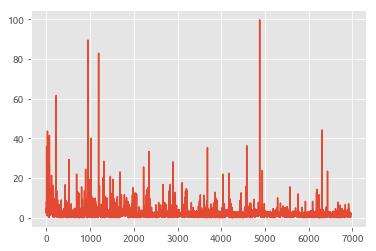

In [10]:
# 2.7 Run training for MAX_STEPS and save checkpoint at the end.
with tf.Session(graph=mnist_graph) as sess:
    # Run the Op to initialize the variables.
    sess.run(init)
    losses = []
    counter=0
    # Start the training loop.
    for x in arrtest:
        # Read a batch of images and labels.
        #images_feed, labels_feed = data_sets.train.next_batch(BATCH_SIZE)
        mel_feed, labels_feed = [],[]
        for z in xrange(x.mel.shape[1]/10):
            mel_feed.append(x.mel[:,z*10:(z+1)*10].flatten())
            labels_feed.append(x.classNumber)
        #print np.array(mel_feed).shape, " ", np.array(labels_feed).shape
        
        
        # Run one step of the model.  The return values are the activations
        # from the `train_op` (which is discarded) and the `loss` Op.  To
        # inspect the values of your Ops or variables, you may include them
        # in the list passed to sess.run() and the value tensors will be
        # returned in the tuple from the call.
        if not (len(labels_feed)==0):
            _, loss_value = sess.run([train_op, loss],
                                     feed_dict={images_placeholder: np.array(mel_feed),
                                                labels_placeholder: np.array(labels_feed)})
            losses.append(loss_value)
        # Print out loss value.
        counter +=1
        if counter % 1000 == 0:
            print('Step %d: loss = %.2f' % (counter, loss_value))
                      
    
            
    # Write a checkpoint.
    #checkpoint_file = os.path.join(TRAIN_DIR, 'checkpoint')
    #saver.save(sess, checkpoint_file, global_step=step)
    checkpoint_file = os.path.join("/tmp/sound", 'checkpoint')
    saver.save(sess, checkpoint_file, global_step=counter)
    plt.plot(losses)

In [8]:
evaluation = []
for file in glob.glob("fold9/*.wav"):
    evaluation.append(Sound(file))
for file in glob.glob("fold10/*.wav"):
    evaluation.append(Sound(file))

In [11]:
with tf.Session(graph=tf.Graph()) as sess:
    saver = tf.train.import_meta_graph(
        os.path.join("/tmp/sound", "checkpoint-7079.meta"))
    saver.restore(
        sess, os.path.join("/tmp/sound", "checkpoint-7079"))


    # Retrieve the Ops we 'remembered'.
    logits = tf.get_collection("logits")[0]
    images_placeholder = tf.get_collection("images")[0]
    labels_placeholder = tf.get_collection("labels")[0]
    # Add an Op that chooses the top k predictions.
        
    eval_op = tf.nn.top_k(logits)
    
    scores = np.zeros((10,10))
    for x in evaluation:
        good, total = 0, 0
        temp = []
        for z in xrange(x.mel.shape[1]/10):
            mel_feed, labels_feed = [],[]
            mel_feed.append(x.mel[:,z*10:(z+1)*10].flatten())
            labels_feed.append(x.classNumber)
            mel_feed, labels_feed = np.array(mel_feed), np.array(labels_feed)

            # Run evaluation.
            #images_feed, labels_feed = data_sets.validation.next_batch(EVAL_BATCH_SIZE)
            prediction = sess.run(eval_op,
                                  feed_dict={images_placeholder: mel_feed,
                                             labels_placeholder: labels_feed})
            #print type(labels_feed[0]), type(prediction.indices[0][0])
            temp.append(prediction.indices[0][0])
            #if labels_feed[0] == prediction.indices[0][0]:
            #   good+=1
            #total +=1
        if temp:
            scores[labels_feed[0],max(set(temp), key=temp.count)]+=1
        #if good*2 >= total:
         #   print labels_feed, " : ", good, "/", total
        #print count
    print scores
    counter = 0
    for x in scores:
        print "Class %d: %.2f  Quantity: %d" %(counter, x[counter]/np.sum(x), np.sum(x))
        counter +=1
    print "Final score: ", scores.trace()/scores.sum()

[[  16.    0.   89.    5.    2.   43.    9.   25.    0.   11.]
 [   1.    4.   19.    7.    4.    0.    2.    0.    2.   14.]
 [   3.    0.  161.    6.    2.    5.    0.    7.    7.    9.]
 [   1.    0.   71.   75.    9.    4.    1.    0.    9.   24.]
 [   7.    0.   51.    2.   73.    9.   11.   34.    0.   12.]
 [   0.    0.   60.    0.    0.  115.    0.    5.    0.    2.]
 [   3.    0.   45.    0.    2.    0.   12.    0.    0.    1.]
 [   0.    0.   33.    0.   85.    4.    0.   56.    0.    0.]
 [   0.    0.  104.    5.    0.    3.    0.    3.   50.    0.]
 [   0.    0.   67.   12.   10.    6.    3.    6.    3.   93.]]
Class 0: 0.08  Quantity: 200
Class 1: 0.08  Quantity: 53
Class 2: 0.81  Quantity: 200
Class 3: 0.39  Quantity: 194
Class 4: 0.37  Quantity: 199
Class 5: 0.63  Quantity: 182
Class 6: 0.19  Quantity: 63
Class 7: 0.31  Quantity: 178
Class 8: 0.30  Quantity: 165
Class 9: 0.47  Quantity: 200
Final score:  0.400856793146


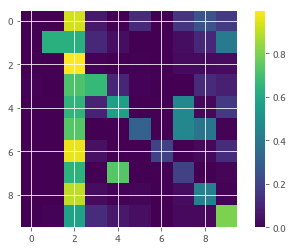

In [84]:
from sklearn.preprocessing import normalize
normscores =normalize(scores)
plt.imshow(normscores)
plt.colorbar()

40000